In [1]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL=DOWNLOAD_ROOT+"/datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    
fetch_housing_data()    

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


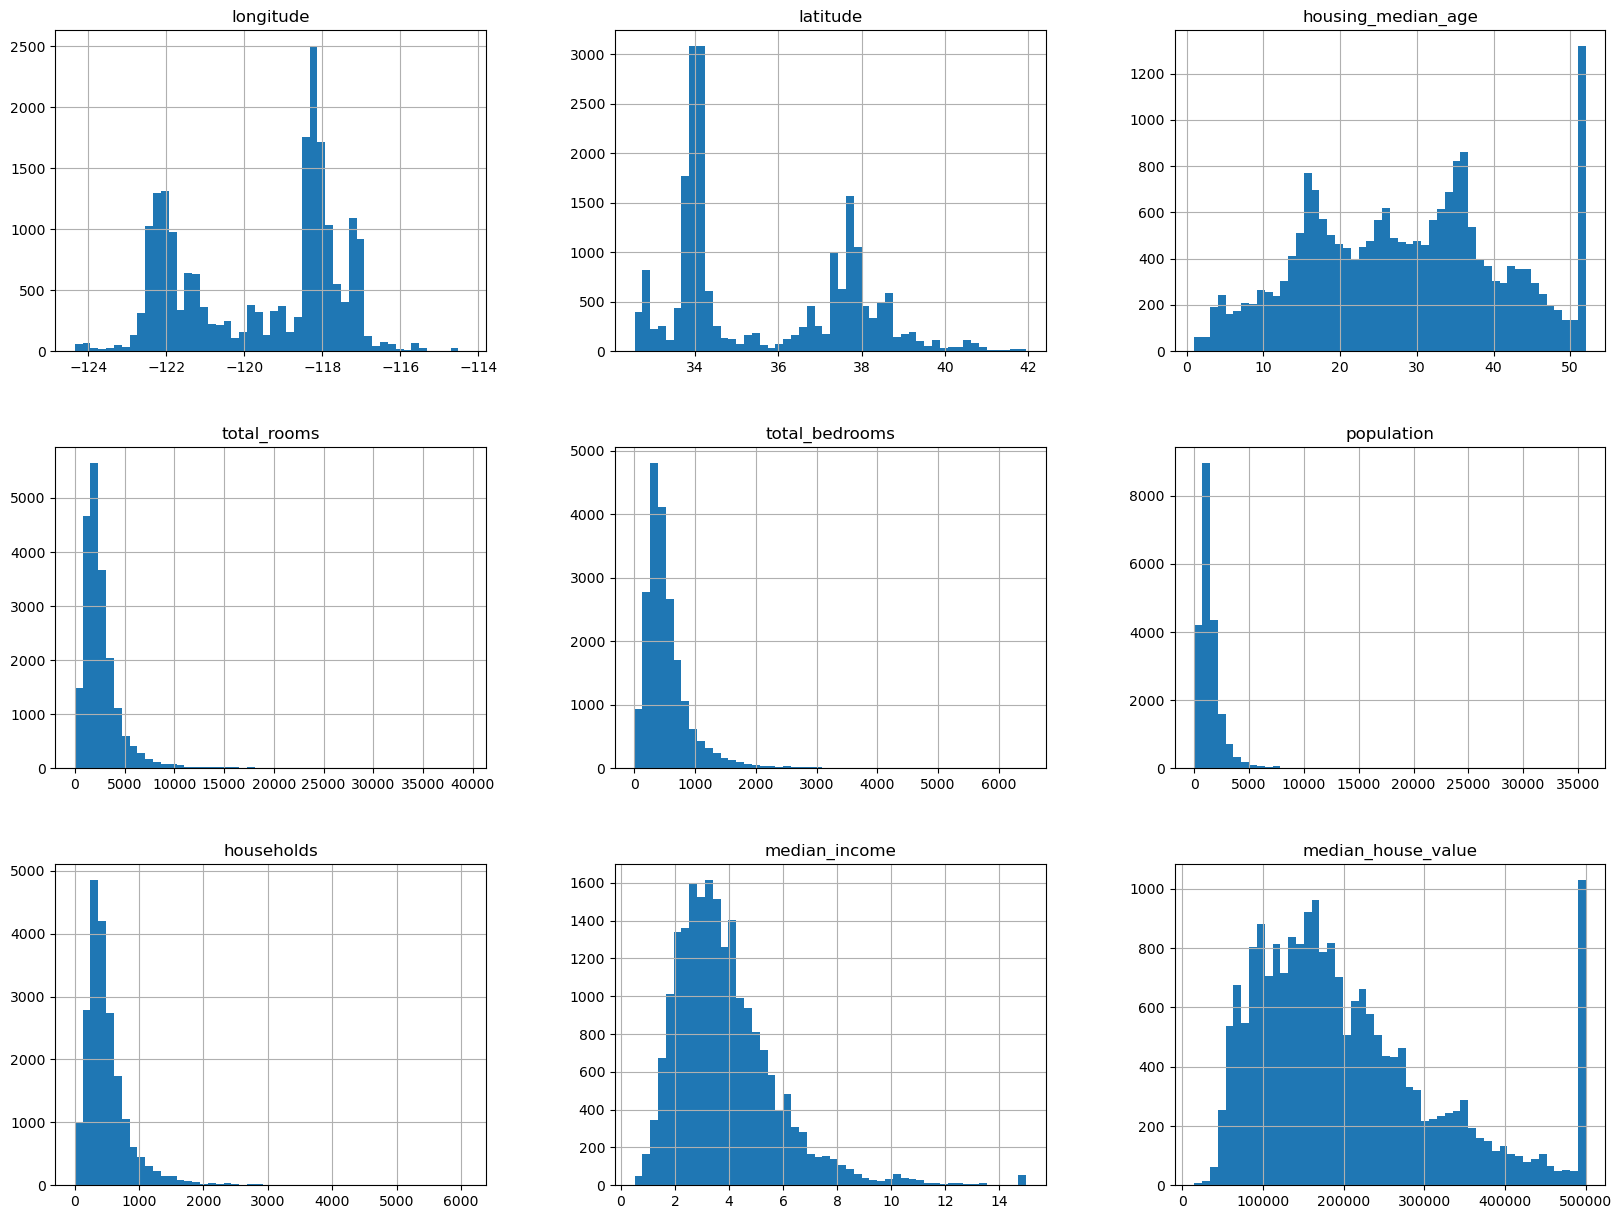

In [7]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
def train_test_split(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

In [13]:
housing['income']=pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

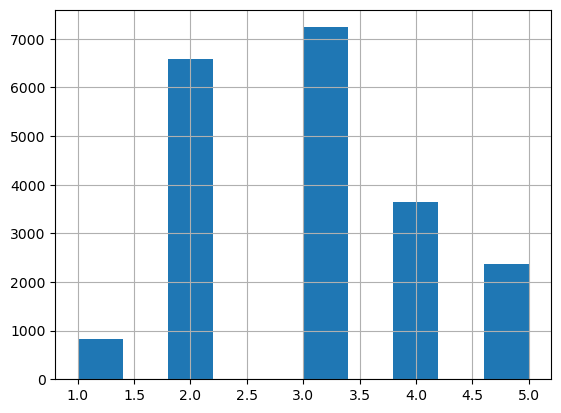

In [14]:
housing['income'].hist()

In [15]:
#its for understanding:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index,test_index in split.split(housing,housing['income']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [17]:
strat_test_set['income'].value_counts()/len(strat_test_set)

3    0.350614
2    0.318798
4    0.176357
5    0.114341
1    0.039890
Name: income, dtype: float64

In [18]:
#we can use starta modeling on the income category as it seems to represent the whole data now let's drop the income atribute so that data get back to its original form.

In [19]:
for set1 in (strat_train_set,strat_test_set):
    set1.drop("income",axis=1,inplace=True)

In [20]:
housing=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

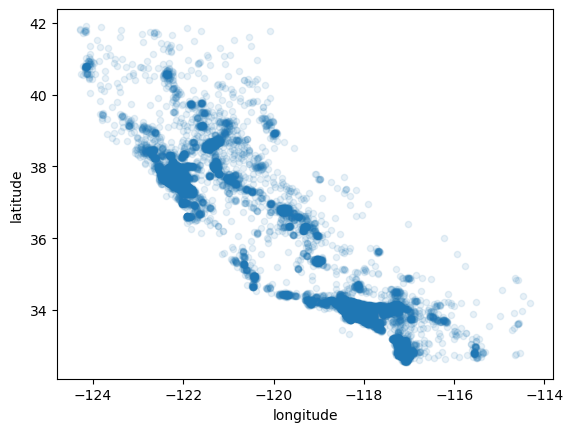

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

In [22]:
# we will set graph as the low to high price

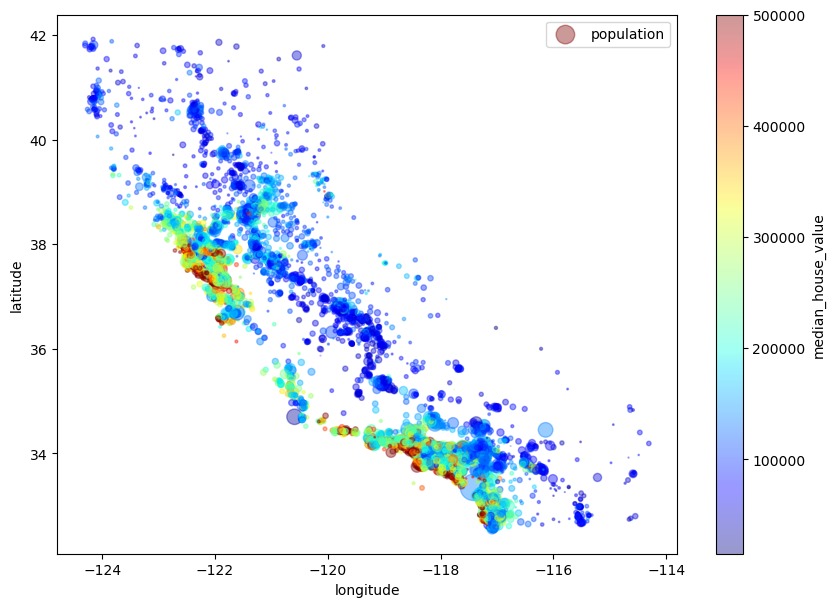

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
s=housing["population"]/100,label="population",figsize=(10,7),
c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [24]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_households"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_bedroom"]=housing["population"]/housing["households"]

In [25]:
corr_matrix=housing.corr()

In [26]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_households,population_per_bedroom
longitude,1.000000,-0.924673,-0.113569,0.052591,0.080166,0.109755,0.065387,-0.022082,-0.052345,-0.025316,0.093272,0.001258
latitude,-0.924673,1.000000,0.012366,-0.043967,-0.077201,-0.118356,-0.081548,-0.073493,-0.137864,0.109373,-0.114492,0.000445
housing_median_age,-0.113569,0.012366,1.000000,-0.362810,-0.322190,-0.296377,-0.302394,-0.112490,0.116305,-0.160069,0.131391,0.011985
total_rooms,0.052591,-0.043967,-0.362810,1.000000,0.929288,0.853244,0.917442,0.200391,0.136801,0.137899,-0.189700,-0.021771
total_bedrooms,0.080166,-0.077201,-0.322190,0.929288,1.000000,0.873909,0.979684,-0.009279,0.049523,0.003806,0.093344,-0.025219
population,0.109755,-0.118356,-0.296377,0.853244,0.873909,1.000000,0.902632,0.002690,-0.024592,-0.079330,0.042720,0.068872
households,0.065387,-0.081548,-0.302394,0.917442,0.979684,0.902632,1.000000,0.011088,0.066788,-0.088024,0.073499,-0.024032
median_income,-0.022082,-0.073493,-0.112490,0.200391,-0.009279,0.002690,0.011088,1.000000,0.687873,0.329378,-0.629917,0.024150
median_house_value,-0.052345,-0.137864,0.116305,0.136801,0.049523,-0.024592,0.066788,0.687873,1.000000,0.144427,-0.262723,-0.024005
rooms_per_household,-0.025316,0.109373,-0.160069,0.137899,0.003806,-0.079330,-0.088024,0.329378,0.144427,1.000000,-0.420560,-0.010955


In [53]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687873
rooms_per_household        0.144427
total_rooms                0.136801
housing_median_age         0.116305
households                 0.066788
total_bedrooms             0.049523
population_per_bedroom    -0.024005
population                -0.024592
longitude                 -0.052345
latitude                  -0.137864
bedrooms_per_households   -0.262723
Name: median_house_value, dtype: float64

In [28]:
housing=strat_train_set.drop("median_house_value",axis=1)

In [29]:
housing_labels=strat_train_set['median_house_value'].copy()

In [54]:
median=housing['total_bedrooms'].median()

In [55]:
housing['total_bedrooms'].fillna(median,inplace=True)

In [56]:
from sklearn.impute import SimpleImputer

In [57]:
imputer=SimpleImputer(strategy='median')

In [58]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [59]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [60]:
X=imputer.transform(housing_num)

In [61]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [62]:
housing_cat=housing[['ocean_proximity']]

In [63]:
housing_cat.head(10)

,ocean_proximity
8577,<1H OCEAN
5960,INLAND
4753,<1H OCEAN
15423,<1H OCEAN
9788,INLAND
16873,NEAR OCEAN
8106,NEAR OCEAN
14913,NEAR OCEAN
14427,NEAR OCEAN
3870,<1H OCEAN


In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
cat_encoder=OneHotEncoder()

In [66]:
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [67]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [68]:
from sklearn.base import BaseEstimator,TransformerMixin

In [69]:
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def _init_(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_hosehold=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[x,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rroms_per_household,population_per_household]
    


In [70]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

TypeError: CombinedAttributesAdder() takes no arguments

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                      ('attribs_adder',CombinedAttributesAdder()),
                      ('std_scaler',StandardScaler()),])

In [73]:
from sklearn.compose import ColumnTransformer

In [74]:
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([("num",num_pipeline,num_attribs),
                               ("cat",OneHotEncoder(),cat_attribs),])

In [75]:
housing_prepared=full_pipeline.fit_transform(housing)

AttributeError: 'CombinedAttributesAdder' object has no attribute 'add_bedrooms_per_room'